<a href="https://colab.research.google.com/github/RITIKA-01A/CIFAR_ResNet/blob/main/CIFAR_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hellow")

hellow


In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 30.0 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
##The training data has been extracted

Importing the dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [ ]:
filename = os.listdir('/content/train')


In [ ]:
type(filename)

list

In [ ]:
len(filename)

50000

In [ ]:
print(filename[0:5])
print(filename[-5:])

['35968.png', '42899.png', '43429.png', '33199.png', '5755.png']
['30256.png', '10096.png', '137.png', '6908.png', '18055.png']


**Labels Processing**

In [ ]:
labels_df = pd.read_csv("/content/trainLabels.csv")
labels_df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
 labels_df[labels_df['id'] == 10096]

,id,label
10095,10096,ship


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
## encoding the output labels into numbers
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [ ]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


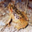

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)


**The images are not in order in the train folder so lets put it in order**

In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])


[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpr arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
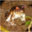

In [ ]:
data[0]

In [ ]:
 #convert images list and labels list to numpy array
 X = np.array(data)
 y = np.array(labels)


In [ ]:
print(type(X))
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
print("X_train : " , X_train.shape)
print("y_train : " , y_train.shape)
print("X_test : " , X_test.shape)
print("y_test : " , y_test.shape)

X_train :  (40000, 32, 32, 3)
y_train :  (40000,)
X_test :  (10000, 32, 32, 3)
y_test :  (10000,)


In [ ]:
## scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
#Model building
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10
#setting up the layers

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10,activation='softmax',)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
##compiling the neural netwrok
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
model.fit(X_train_scaled , y_train , epochs = 100 , validation_split=0.2 )

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2534 - loss: 2.0191 - val_acc: 0.3683 - val_loss: 1.7684
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - acc: 0.3588 - loss: 1.7715 - val_acc: 0.3760 - val_loss: 1.7249
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.3874 - loss: 1.6950 - val_acc: 0.4010 - val_loss: 1.6718
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4115 - loss: 1.6403 - val_acc: 0.4108 - val_loss: 1.6351
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4323 - loss: 1.5926 - val_acc: 0.4109 - val_loss: 1.6313
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.4261 - loss: 1.5743 - val_acc: 0.4154 - val_loss: 1.6431
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4382 - loss: 1.5601 - val_acc: 0.4276 - val_loss: 1.6012
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4452 - loss: 1.5358 - val_acc: 0.4245 - val_loss: 1.6183
Epoch 9/100
1000/1000 ━━━━━━━━━━

TRANSFER LEARNING

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [ ]:
covolutional_base = ResNet50(weights='imagenet' , include_top=False , input_shape = (256,256,3))
covolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(covolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled , y_train , validation_split = 0.2, epochs = 10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 420s 365ms/step - acc: 0.3144 - loss: 2.0781 - val_acc: 0.6716 - val_loss: 1.1931
Epoch 2/10
  24/1000 ━━━━━━━━━━━━━━━━━━━━ 5:09 317ms/step - acc: 0.6143 - loss: 1.2116

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()